# DSO105 Intermediate Stats L1 - Basic Stats in Python (olympic Events video follow along)

In [ ]:
#### Page 1

(olympic Events video follow along)

## Import Packages

In [46]:
## add all new packages in up here, then run cell again

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

## Load in Data

In [2]:
olympicEvents = pd.read_excel('../../datasets/olympicEvents.xlsx')

In [3]:
olympicEvents.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Data Wrangling

### Drop the NAs

In [6]:
olympicEvents.dropna(inplace=True)

## Single Sample t-test

### Question: Is the average age different from 22?

### test for assumptions first - is it Normally Distributed

<AxesSubplot:>

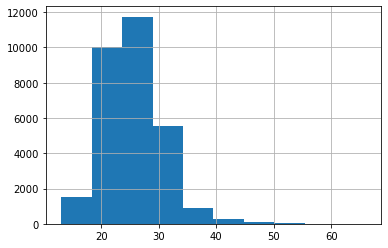

In [7]:
olympicEvents['Age'].hist()

### looks like it could maybe be normally distributed

## Run the Analysis

In [8]:
stats.ttest_1samp(olympicEvents['Age'], 22)

Ttest_1sampResult(statistic=117.96999514411488, pvalue=0.0)

### We can tell the average age is differnt from 22 - is it higher? is it lower?

In [9]:
olympicEvents.Age.mean()

25.42901162983334

## Independent t-test

### Does the average age differ between men and women?

### test for assumptions first - is it Normally Distributed

<AxesSubplot:>

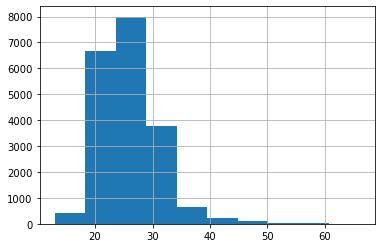

In [10]:
olympicEvents.Age[olympicEvents.Sex == 'M'].hist()
## distribution of male age

<AxesSubplot:>

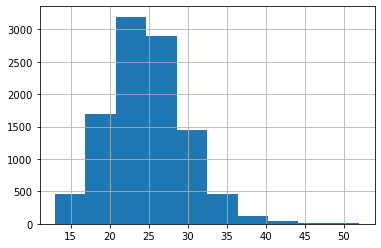

In [11]:
olympicEvents.Age[olympicEvents.Sex == 'F'].hist()
## distribution of female age

# moving forward like they are normally distributed

In [12]:
ttest_ind(olympicEvents.Age[olympicEvents.Sex == 'M'], olympicEvents.Age[olympicEvents.Sex == 'F'])

Ttest_indResult(statistic=20.811905071131516, pvalue=1.5853311644818236e-95)

In [13]:
olympicEvents.groupby('Sex')['Age'].mean()

Sex
F    24.597585
M    25.862942
Name: Age, dtype: float64

# Independent Chi-Square

## Trying to see if the season influences the type of medal earned

### start with crosstab

In [15]:
crosstab = pd.crosstab(olympicEvents['Season'], olympicEvents['Medal'])

In [16]:
crosstab

Medal,Bronze,Gold,Silver
Season,,,
Summer,8566,8542,8233
Winter,1582,1625,1633


### both season and medal are categorical 

In [17]:
stats.chi2_contingency(crosstab)

(3.4745101681496746,
 0.17600285120006448,
 2,
 array([[8520.60793214, 8536.56098207, 8283.83108578],
        [1627.39206786, 1630.43901793, 1582.16891422]]))

### - Chi-square value
### - p-value
### - number of seasons(??)
### - array of medal counts if things were equal

In [20]:
## p-value of .176 is not significant - makes sense because the Chi-square array is close to the real life medal counts

# Correlation

In [21]:
olympicEvents['Height'].corr(olympicEvents['Weight'])

0.8018308248560182

In [23]:
## .8 out of 1 is pretty strong
## it is positively correlated (as one goes up so does the other)

<AxesSubplot:>

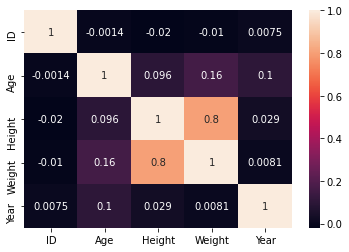

In [25]:
sns.heatmap(olympicEvents.corr(), annot = True)
## to get a visual representation of all the variables we call sns.heatmap(dataset.corr())
## annot = True is the show the actual correlation values

Introduction

This lesson will cover the basic statistics you already know how to do in MS Excel and R in Python.

By the end of this lesson, you should be able to complete the following tasks in Python:

Single sample, independent, and dependent t tests

Chi-Squares

Correlation

In [26]:
#### Page 2

# Single Sample t-test

Remember that a single-sample t-test is meant to examine whether a particular value is different than the population mean. You've already performed single sample t-tests by hand and using R. Now it's time to learn how to complete them in Python!

In [28]:
## packages already imported above

In [29]:
## load in data

In [4]:
hybrid2013 = pd.read_excel('../../datasets/hybrid2013.xlsx')

In [5]:
hybrid2013.head()

,carid,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
0,111,Prius C,2013,19080,8.70,50,50,C,1
1,112,Jetta,2013,24995,12.66,45,45,C,1
2,113,Civic,2013,24360,10.20,44,44,C,1
3,114,Prius,2013,24200,10.20,50,50,M,3
4,115,Fusion FWD,2013,27200,11.72,47,47,M,3


## Question: is a cost of $25,000 for a hybrid in 2013 different than the mean cost?

## testing asumptions - is this normally distributed? 

<AxesSubplot:>

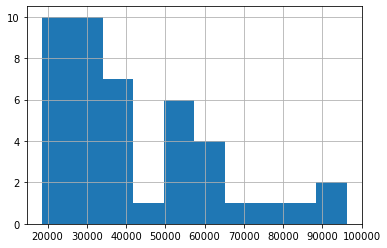

In [32]:
hybrid2013['msrp'].hist()

In [33]:
# Looks like things aren't quite normally distributed, but you'll let it slide for now for learning purposes.

## Run the analysis

There is only one line of code needed to run a single sample t-test in Python. The function stats.ttest_1samp() performs the function, and takes the argument of the data column that contains your population values, and then the x value that you are trying to test against, which is $25,000.

In [34]:
stats.ttest_1samp(hybrid2013['msrp'], 25000)

Ttest_1sampResult(statistic=6.003733172775179, pvalue=3.9231807518835515e-07)

The statistic is your t value, and the p value is the one associated with that t-test. Remember that the p value is written in scientific notation, so this is significant at p < .05. That means that buying a hybrid car for $25,000 in 2013 is different than the population mean. Is it higher or lower? To answer that question, you will need to examine the population mean:

In [35]:
hybrid2013.msrp.mean()

42943.48837209302

In [36]:
## the average hybrid msrp in 2013 was $42943.49 cents - well above the point of $25000 we were testing

In [37]:
#### Page 3

Using the hybrid2013 dataset you worked with in the lesson, determine whether a miles per gallon (mpg) rating of 40 is unusual for a hybrid car on the market in 2013. To do this, you will need to test for the assumption of normality by creating a histogram, and then run a single sample ttest.

<AxesSubplot:>

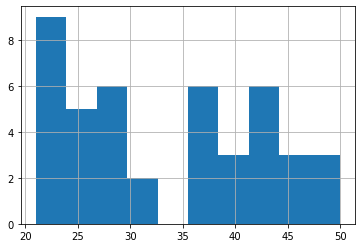

In [39]:
# test the assumptions - is it normally distributed?
hybrid2013.mpg.hist()

In [40]:
# not normally distributed, but continue to answer the question

In [41]:
# run the single sample t-test analysis
stats.ttest_1samp(hybrid2013['mpg'], 40)

Ttest_1sampResult(statistic=-4.427320491687408, pvalue=6.67005084670698e-05)

In [42]:
# The p-value tells us that 40 is significantly different than the average mpg
# by how much? Is it higher or lower?
hybrid2013.mpg.mean()

33.48837209302326

In [43]:
# 33.49 mpg is the average for hybrids in 2013, well lower than our data point of 40

In [44]:
#### Page 4 is the solution for activity above

In [45]:
#### Page 5

bullet
* example one

bullet 2
- example 2

In [48]:
## 2 cells above show examples of markdowns with * and - to make bullets

# Testing Assumptions

The only assumption that independent t has is normality. You will need to test normality for each of your groups - compact and mid-sized hybrid cars.

This code is very similar to before, but has an extra layer of specifying which values from the carclass you want to examine:

<AxesSubplot:>

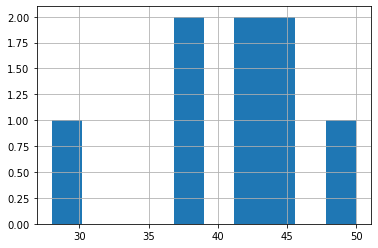

In [53]:
hybrid2013.mpg[hybrid2013.carclass == 'C'].hist()
# compact hybrid cars histogram

Same thing for the mid-size hybrid cars:

<AxesSubplot:>

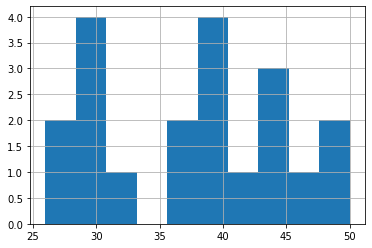

In [54]:
hybrid2013.mpg[hybrid2013.carclass == 'M'].hist()
# mid-sized hybrid cars histogram

It looks like neither of these are bell-shaped, and are thus not normal, but for the purposes of learning, you will continue.

# Running the Analysis

You will use the function ttest_ind() to run an independent t test in Python. The arguments are two things you want to compare to each other. If you happen to have those two things in separate columns, then it would simply look like this mock code:

In [51]:
# ttest_ind(data[column1], data[column2]) <--- this is example code

But since in this case, your data is all stored in the same carclass column, and you want to pull out the data for certain values, the code looks just a bit more complicated:

In [52]:
ttest_ind(hybrid2013.mpg[hybrid2013.carclass == 'C'], hybrid2013.mpg[hybrid2013.carclass == 'M'])

Ttest_indResult(statistic=1.0751886097093057, pvalue=0.29216712457079796)

In [55]:
# with a p-value above 0.05 we see there is no significant difference b/t compact and mid-size in terms of mpg. small t-value also indicates little to no significance 

In [56]:
#### Page 6

For your Activity, you will be computing an independent t-test to see if the miles per gallon differ between compact (C) and large (L) cars.

To do this, you will need to test for the assumption of normality for both groups by creating a histogram, and then run an independent ttest.

<AxesSubplot:>

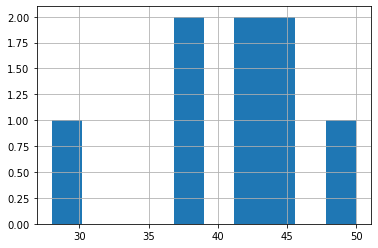

In [59]:
# testing assumptions for both groups, compact and large
hybrid2013.mpg[hybrid2013.carclass == 'C'].hist()
# compact mpg histogram

<AxesSubplot:>

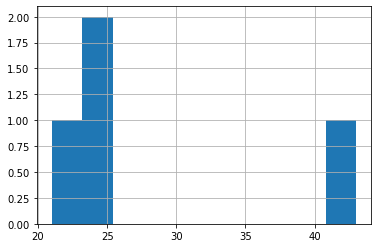

In [60]:
hybrid2013.mpg[hybrid2013.carclass == 'L'].hist()
# large mpg histogram

### not normally distributed, but still complete the activity.

In [61]:
stats.ttest_ind(hybrid2013.mpg[hybrid2013.carclass == 'C'], hybrid2013.mpg[hybrid2013.carclass == 'L'])

Ttest_indResult(statistic=2.598820461640718, pvalue=0.026545168887970098)

In [62]:
# with alpha at 0.05, and a p-value of 0.02654 we discover there is a significant difference in the mpg of compact and large hybrids

In [63]:
# time to get the average of each
hybrid2013.mpg[hybrid2013.carclass == 'C'].mean()
# compact

40.75

In [65]:
hybrid2013.mpg[hybrid2013.carclass == 'L'].mean()
# large

28.5

#### There is over a 12 mpg differnce in these two carclasses.

In [66]:
#### Page 7 is solution to above activity

In [67]:
#### Page 8

# Dependent t-test

The hybrid car data has been restructured for dependent t-tests and an additional year of data, 2012, has been added, and looks like this:

In [6]:
hybrid201213 = pd.read_excel('../../datasets/hybrid2012-13.xlsx')
hybrid201213.head()

,vehicle,msrp2012,accelrate2012,mpg2012,mpgmpge2012,carclass2012,carclass_id2012,msrp2013,accelrate2013,mpg2013,mpgmpge2013,carclass2013,carclass_id2013
0,ActiveHybrid 3,19006.62,9.35,50,50,C,1,19080,8.70,50,50,C,1
1,ActiveHybrid 5,32095.61,8.82,50,95,M,3,24995,12.66,45,45,C,1
2,Ampera,31739.55,11.11,37,98,C,1,24200,10.20,50,50,M,3
3,Camry LE,62180.23,16.67,26,26,M,3,18600,11.76,42,42,C,1
4,Chevrolet Volt,59126.14,16.95,31,31,M,3,69850,16.39,21,21,SUV,6


Notice that it has the same variables repeated twice, once for 2012, and once for 2013. You'll also notice that the number of rows is greatly reduced form the dataset with only hybrid cars from 2013. This is because only those cars that had an entry for both 2012 and 2013 were included.

You will be testing to see if the price of hybrid cars changes from 2012 to 2013.

## Testing Assumptions - normality

As with independent t-tests, you'll need a histogram for each variable.

<AxesSubplot:>

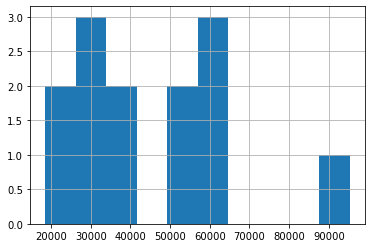

In [73]:
hybrid201213['msrp2012'].hist()
# 2012 msrp histogram

<AxesSubplot:>

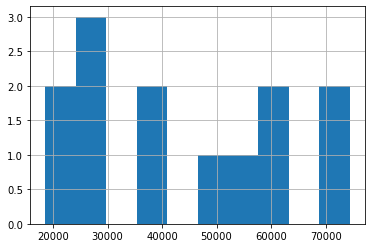

In [75]:
hybrid201213['msrp2013'].hist()
# 2013 msrp histogram

Not really normally distributed, but ignore for now for the purposes of learning.

## Analysis time

You can use the function stats.ttest_rel() to compute a dependent t-test in Python. Think of the _rel as standing for related, since the samples are paired. The only arguments are the two columns of data you want to use.

In [78]:
stats.ttest_rel(hybrid201213['msrp2012'], hybrid201213['msrp2013'])

Ttest_relResult(statistic=0.23749650777597428, pvalue=0.8162780348473798)

In [79]:
## This shows that there is NO significant change in hybrid car price from 2012 to 2013, since the p value is not less than .05.

In [80]:
#### Page 9

For your Activity, you will be computing an dependent t-test to see if the miles per gallon changes between 2012 and 2013.

Determine if the mean miles per gallon changes from 2012 to 2013. To do this, you will need to test for the assumption of normality for both groups by creating a histogram, and then run a dependent ttest.

#### normality testing

<AxesSubplot:>

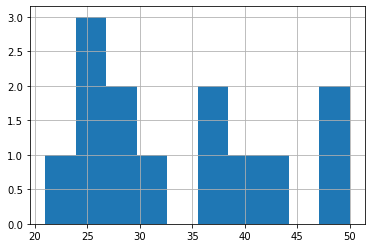

In [82]:
hybrid201213['mpg2012'].hist()
# 2012 mpg histogram

<AxesSubplot:>

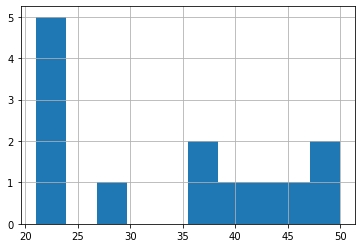

In [83]:
hybrid201213['mpg2013'].hist()
# 2013 mpg histogram

In [84]:
#### Not normally distributed, continue the activity.

#### Analysis of mpg from 2012 to 2013

In [86]:
stats.ttest_rel(hybrid201213['mpg2012'], hybrid201213['mpg2013'])

Ttest_relResult(statistic=0.14466598084438312, pvalue=0.8873759030512348)

In [88]:
## p-value shows no significance, t-value very small.
## check averages for fun
hybrid201213['mpg2012'].mean()

34.0

In [89]:
hybrid201213['mpg2013'].mean()

33.46153846153846

### within half a mile of each other - 2012 having the higher of the two

In [90]:
#### Page 10 is solution for above activity

In [91]:
#### Page 11

# Independent Chi-Square

##### remember the code for doing Chi-Squares in Python requires a crosstab, not raw data

###### An independent Chi-Square is used when you want to determine whether two categorical variables influence each other.

In [7]:
# load the data
lead_lipstick = pd.read_csv('../../datasets/lead_lipstick.csv')
lead_lipstick.head()

,JRC_code,purchCntry,prodCntry,Pb,sdPb,shade,prodType,priceCatgry
0,C135,NL,NL,3.75,0.24,Red,LP,2
1,C18,FI,FI,2.29,0.07,Red,LP,2
2,C20,FI,IT,1.27,0.06,Red,LP,2
3,C164,DE,FR,1.21,0.06,Red,LP,2
4,C71,MT,UK,0.85,0.04,Red,LP,2


The data is about the lipstick content in lead. However, it contains some great categorical fields that you'll be using. 

The first is product type, prodType and it has two levels: LP is lipstick, and LG is lip gloss. 

The second is price category, priceCatgry, and it has three levels:
* 1: < 5 euros
* 2: 5-15 euros
* 3: > 15 euros

You will test to see if the price of the product depends on whether it is a lip stick or a lip gloss.

## Test Assumptions and Run the Analysis

There is only one assumption for Chi-Square, and it is that when you are looking at the contingency tables, the expected frequencies for each cell need to have at least 5 entries per cell. In Python, the only way to easily generate an expected frequencies table is actually to run the analysis. So, you will conduct your independent Chi-Square first, and then make sure it meets this assumption!

### Create a Contingency Table

The first thing that needs to be done, before you can run the independent Chi-Square analysis, is to create a contingency table, sometimes called a crosstab, which shows how each level of each variable crosses with the other variable levels. pandas saves the day with an easy to use function called crosstab():

In [97]:
lipstick_crosstab = pd.crosstab(lead_lipstick['prodType'], lead_lipstick['priceCatgry'])
lipstick_crosstab

priceCatgry,1,2,3
prodType,,,
LG,19,43,12
LP,34,92,23


The three price categories are on the top, and the two different product types are along the side. What is shown in the cells are how many products fit in both categories. For instance, there are 19 lip glosses less than 5 euros.



### Running the Independent Chi-Square

Once you have the contingency table, then you can run the function stats.chi2_contingency on the contingency table you have created:

In [98]:
stats.chi2_contingency(lipstick_crosstab)

(0.2969891724608704,
 0.8620046738525345,
 2,
 array([[17.58744395, 44.79820628, 11.61434978],
        [35.41255605, 90.20179372, 23.38565022]]))

In [99]:
## 0.297 is Chi-Square stat
## 0.862 is our p-value (from this, we can see no significant relationship b/t product type and product price. neither lipstick nor lipgloss is pricier or cheaper than the other)

### Test the Assumption of 5 Cases per Expected Cell

The last piece of the output, labeled array, is your expected count contingency table, albeit not a very pretty one! The expected count is what you would expect to happen if there was no relationship between the two variables. Since all of these values are over 5, this means that the assumption has been met, and you are free to present and discuss these results without any limitations!

In [101]:
## the array is close to the real world data

In [102]:
#### Page 12 (activity)

For your Activity, you will be computing an independent Chi-Square to see if the shade of lipstick and the price category are related.

Determine if the shade of lipstick and the price category are related. To do this, you will need to:
* Create a contingency table
* Test for the assumption of 5 per cell in the expected contingency table
* Compute an independent Chi-Square

In [104]:
lead_lipstick.head()

,JRC_code,purchCntry,prodCntry,Pb,sdPb,shade,prodType,priceCatgry
0,C135,NL,NL,3.75,0.24,Red,LP,2
1,C18,FI,FI,2.29,0.07,Red,LP,2
2,C20,FI,IT,1.27,0.06,Red,LP,2
3,C164,DE,FR,1.21,0.06,Red,LP,2
4,C71,MT,UK,0.85,0.04,Red,LP,2


In [105]:
lead_lipstick.shade.value_counts()

Pink      81
Brown     60
Red       45
Purple    37
Name: shade, dtype: int64

##### Contingency Table

In [107]:
lipstick_crosstab2 = pd.crosstab(lead_lipstick['shade'], lead_lipstick['priceCatgry'])
lipstick_crosstab2

priceCatgry,1,2,3
shade,,,
Brown,20,30,10
Pink,20,49,12
Purple,8,23,6
Red,5,33,7


##### compute independent Chi-Square

In [109]:
stats.chi2_contingency(lipstick_crosstab2)

(7.860569553614045,
 0.2484973879479863,
 6,
 array([[14.26008969, 36.32286996,  9.41704036],
        [19.25112108, 49.03587444, 12.71300448],
        [ 8.79372197, 22.39910314,  5.80717489],
        [10.69506726, 27.24215247,  7.06278027]]))

In [111]:
## 7.8601 is out Chi-Square stat
## 0.24 pivalue shows that there is no significant difference b/t shade and price. shade does not affect price

##### Test the assumption of 5 per cell

In [112]:
## our array has at least 5 cases per cell - this meets the assumption

In [113]:
#### Page 13 (solution to above activity)

In [114]:
#### Page 14

In [1]:
### random trying to insert a website hyperlink

[myGitHub](https://github.com/nhardemandata)

# Correlation

Correlations can be done on two continuous variables, to determine the relationship between them. As a reminder, a correlation can be between zero and one, and either positive or negative. The larger it is, the more closely related the two variables are.

In [8]:
cruise_ship = pd.read_excel('../../datasets/cruise_ship.xlsx')

In [9]:
cruise_ship.head()

,Ship,Line,YearBlt,Tonnage,passngrs,Length,Cabins,Crew,PassSpcR,outcab
0,Journey,Azamara,2007,30277,694,594,355,355,42.64,329
1,Quest,Azamara,2007,30277,694,594,355,355,42.64,329
2,Celebration,Carnival,1987,47262,1486,722,743,670,31.80,453
3,Conquest,Carnival,2002,110000,2974,953,1488,1910,36.99,892
4,Destiny,Carnival,1996,101353,2642,892,1321,1000,38.36,740


### Run One Correlation

Using the function .corr(), it's easy to run a correlation on a selected two variables. For instance, do you think that the number of passengers and the number of cabins on a cruise ship would relate to each other?

In [7]:
cruise_ship['passngrs'].corr(cruise_ship['Cabins'])
# The first thing you type is one of your variables, then you call .cor() and list the second variable.

0.9763413679845939

It should not come as a surprise to you that the number of passengers and the number of cabins are very related. .97 is about as strong as a correlation gets! This correlation is also positive, which means that as the number of passengers increase, so does the number of cabins, and vice versa.

### Create a Correlation Matrix

Running one correlation can be nice, but sometimes you'd like to know how all your data relates to each other! In that case, call in the big guns, and go for a correlation matrix!

Drop Non-Continuous Variables

When you are creating a correlation matrix, you are feeding the code your entire data set. But you can only run Pearson's correlations on continuous variables! So it's important to drop anything that is categorical or a string first.

In [8]:
cruise_ship1 = cruise_ship.drop(['Ship', 'Line'], axis=1)

As you'll recall, the .drop() function will remove any columns specified in the square brackets, and the axis=1 arguments tells Python that these are the names of columns (not rows). So you are getting rid of the Ship and Line columns here.

In [9]:
cruise_ship1.head()

,YearBlt,Tonnage,passngrs,Length,Cabins,Crew,PassSpcR,outcab
0,2007,30277,694,594,355,355,42.64,329
1,2007,30277,694,594,355,355,42.64,329
2,1987,47262,1486,722,743,670,31.80,453
3,2002,110000,2974,953,1488,1910,36.99,892
4,1996,101353,2642,892,1321,1000,38.36,740


### Using .corr() on An Entire Dataset

In [10]:
cruise_ship1.corr(method='pearson')

,YearBlt,Tonnage,passngrs,Length,Cabins,Crew,PassSpcR,outcab
YearBlt,1.000000,0.606646,0.515542,0.532286,0.510019,0.530657,0.278830,0.547203
Tonnage,0.606646,1.000000,0.945061,0.922368,0.948764,0.927569,-0.040846,0.921931
passngrs,0.515542,0.945061,1.000000,0.883535,0.976341,0.915234,-0.294867,0.914551
Length,0.532286,0.922368,0.883535,1.000000,0.889798,0.895857,-0.090488,0.901047
Cabins,0.510019,0.948764,0.976341,0.889798,1.000000,0.950823,-0.253181,0.934136
Crew,0.530657,0.927569,0.915234,0.895857,0.950823,1.000000,-0.155509,0.900466
PassSpcR,0.278830,-0.040846,-0.294867,-0.090488,-0.253181,-0.155509,1.000000,-0.145602
outcab,0.547203,0.921931,0.914551,0.901047,0.934136,0.900466,-0.145602,1.000000


Make .corr() Pretty!

Not pretty enough for you? Difficult to make sense of rows and rows of numbers? Well, you're in luck. Adding a couple arguments can help you interpret things and add a little visual interest.

In [11]:
cruise_ship1.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
# Start by using the .style.format() function. In it, you will place {:.2} to specify the gradients. Then you can use background_gradient() to specify the colors. 
# This pulls the coolwarm palette from matplotlib pyplot. cmap= stands for color map. Then lastly, you need the argument axis=1 so that Python knows you are focused on columns.

,YearBlt,Tonnage,passngrs,Length,Cabins,Crew,PassSpcR,outcab
YearBlt,1.0,0.61,0.52,0.53,0.51,0.53,0.28,0.55
Tonnage,0.61,1.0,0.95,0.92,0.95,0.93,-0.041,0.92
passngrs,0.52,0.95,1.0,0.88,0.98,0.92,-0.29,0.91
Length,0.53,0.92,0.88,1.0,0.89,0.9,-0.09,0.9
Cabins,0.51,0.95,0.98,0.89,1.0,0.95,-0.25,0.93
Crew,0.53,0.93,0.92,0.9,0.95,1.0,-0.16,0.9
PassSpcR,0.28,-0.041,-0.29,-0.09,-0.25,-0.16,1.0,-0.15
outcab,0.55,0.92,0.91,0.9,0.93,0.9,-0.15,1.0


In [12]:
## different colors

In [14]:
cruise_ship1.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('viridis'), axis=1)

,YearBlt,Tonnage,passngrs,Length,Cabins,Crew,PassSpcR,outcab
YearBlt,1.0,0.61,0.52,0.53,0.51,0.53,0.28,0.55
Tonnage,0.61,1.0,0.95,0.92,0.95,0.93,-0.041,0.92
passngrs,0.52,0.95,1.0,0.88,0.98,0.92,-0.29,0.91
Length,0.53,0.92,0.88,1.0,0.89,0.9,-0.09,0.9
Cabins,0.51,0.95,0.98,0.89,1.0,0.95,-0.25,0.93
Crew,0.53,0.93,0.92,0.9,0.95,1.0,-0.16,0.9
PassSpcR,0.28,-0.041,-0.29,-0.09,-0.25,-0.16,1.0,-0.15
outcab,0.55,0.92,0.91,0.9,0.93,0.9,-0.15,1.0


In [15]:
cruise_ship1.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('plasma'), axis=1)

,YearBlt,Tonnage,passngrs,Length,Cabins,Crew,PassSpcR,outcab
YearBlt,1.0,0.61,0.52,0.53,0.51,0.53,0.28,0.55
Tonnage,0.61,1.0,0.95,0.92,0.95,0.93,-0.041,0.92
passngrs,0.52,0.95,1.0,0.88,0.98,0.92,-0.29,0.91
Length,0.53,0.92,0.88,1.0,0.89,0.9,-0.09,0.9
Cabins,0.51,0.95,0.98,0.89,1.0,0.95,-0.25,0.93
Crew,0.53,0.93,0.92,0.9,0.95,1.0,-0.16,0.9
PassSpcR,0.28,-0.041,-0.29,-0.09,-0.25,-0.16,1.0,-0.15
outcab,0.55,0.92,0.91,0.9,0.93,0.9,-0.15,1.0


In [16]:
cruise_ship1.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('magma'), axis=1)

,YearBlt,Tonnage,passngrs,Length,Cabins,Crew,PassSpcR,outcab
YearBlt,1.0,0.61,0.52,0.53,0.51,0.53,0.28,0.55
Tonnage,0.61,1.0,0.95,0.92,0.95,0.93,-0.041,0.92
passngrs,0.52,0.95,1.0,0.88,0.98,0.92,-0.29,0.91
Length,0.53,0.92,0.88,1.0,0.89,0.9,-0.09,0.9
Cabins,0.51,0.95,0.98,0.89,1.0,0.95,-0.25,0.93
Crew,0.53,0.93,0.92,0.9,0.95,1.0,-0.16,0.9
PassSpcR,0.28,-0.041,-0.29,-0.09,-0.25,-0.16,1.0,-0.15
outcab,0.55,0.92,0.91,0.9,0.93,0.9,-0.15,1.0


In [17]:
cruise_ship1.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('inferno'), axis=1)

,YearBlt,Tonnage,passngrs,Length,Cabins,Crew,PassSpcR,outcab
YearBlt,1.0,0.61,0.52,0.53,0.51,0.53,0.28,0.55
Tonnage,0.61,1.0,0.95,0.92,0.95,0.93,-0.041,0.92
passngrs,0.52,0.95,1.0,0.88,0.98,0.92,-0.29,0.91
Length,0.53,0.92,0.88,1.0,0.89,0.9,-0.09,0.9
Cabins,0.51,0.95,0.98,0.89,1.0,0.95,-0.25,0.93
Crew,0.53,0.93,0.92,0.9,0.95,1.0,-0.16,0.9
PassSpcR,0.28,-0.041,-0.29,-0.09,-0.25,-0.16,1.0,-0.15
outcab,0.55,0.92,0.91,0.9,0.93,0.9,-0.15,1.0


In [18]:
cruise_ship1.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('cividis'), axis=1)

,YearBlt,Tonnage,passngrs,Length,Cabins,Crew,PassSpcR,outcab
YearBlt,1.0,0.61,0.52,0.53,0.51,0.53,0.28,0.55
Tonnage,0.61,1.0,0.95,0.92,0.95,0.93,-0.041,0.92
passngrs,0.52,0.95,1.0,0.88,0.98,0.92,-0.29,0.91
Length,0.53,0.92,0.88,1.0,0.89,0.9,-0.09,0.9
Cabins,0.51,0.95,0.98,0.89,1.0,0.95,-0.25,0.93
Crew,0.53,0.93,0.92,0.9,0.95,1.0,-0.16,0.9
PassSpcR,0.28,-0.041,-0.29,-0.09,-0.25,-0.16,1.0,-0.15
outcab,0.55,0.92,0.91,0.9,0.93,0.9,-0.15,1.0


### Use sns.heatmap()

You can also do a correlation matrix easily using the seaborn package:

<AxesSubplot:>

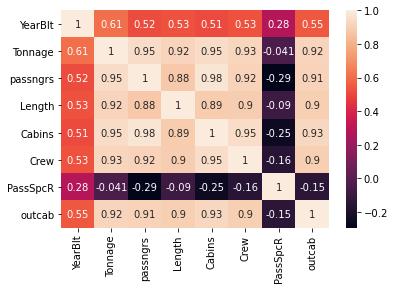

In [19]:
sns.heatmap(cruise_ship1.corr(), annot=True)
# Just put in your dataset name as an argument, then call the .corr() function again, and use the argument annot=True to have the values printed on the plot. 
# There's a little less customization here, but it's also a little simpler, with fewer arguments.

## Summary

In this lesson, you learned how to perform all the basic statistics you have learned in MS Excel and R, including t-tests, Chi-Squares, and correlations. It is important that you become proficient with the basics in all three languages!



In [21]:
#### Page 15 (activity)

In [10]:
power_lifting = pd.read_csv('../../datasets/power_lifting.csv')

In [11]:
power_lifting.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


In [24]:
### Run single correlations

In [28]:
power_lifting['BodyweightKg'].corr(power_lifting['BestBenchKg'])

0.5844312818128141

In [29]:
## Body weight and a weight lifter's best bench are positively correlated

#### Drop non-continuous variables

In [31]:
power_lifting1 = power_lifting.drop(['Name', 'Equipment', 'Division', 'Sex'], axis = 1)

In [32]:
power_lifting1.head()

,MeetID,Age,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,47.0,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,42.0,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,42.0,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,42.0,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,18.0,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


#### .corr() on the entire data set

In [33]:
power_lifting1.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('viridis'), axis=1)

,MeetID,Age,BodyweightKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Wilks
MeetID,1.0,-0.049,-0.0015,0.25,-0.074,0.31,-0.077,0.25,-0.057,0.0064,0.011
Age,-0.049,1.0,0.14,0.011,-0.033,0.082,0.049,0.026,-0.041,-0.18,-0.25
BodyweightKg,-0.0015,0.14,1.0,0.15,0.59,0.075,0.58,0.038,0.57,0.41,0.033
Squat4Kg,0.25,0.011,0.15,1.0,0.13,0.22,0.18,0.3,0.18,0.16,0.069
BestSquatKg,-0.074,-0.033,0.59,0.13,1.0,0.096,0.83,0.047,0.84,0.96,0.77
Bench4Kg,0.31,0.082,0.075,0.22,0.096,1.0,0.081,0.39,0.12,0.051,-0.0027
BestBenchKg,-0.077,0.049,0.58,0.18,0.83,0.081,1.0,0.091,0.81,0.55,0.26
Deadlift4Kg,0.25,0.026,0.038,0.3,0.047,0.39,0.091,1.0,0.00085,0.062,0.015
BestDeadliftKg,-0.057,-0.041,0.57,0.18,0.84,0.12,0.81,0.00085,1.0,0.86,0.62
TotalKg,0.0064,-0.18,0.41,0.16,0.96,0.051,0.55,0.062,0.86,1.0,0.88


In [34]:
## best dead lift and best squat are positively correlated. While total kg and best squat are th closest to 1.

#### seaborn heatmap

<AxesSubplot:>

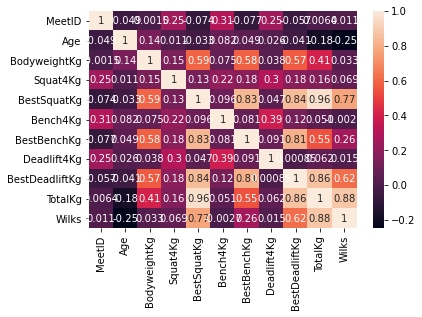

In [37]:
sns.heatmap(power_lifting.corr(), annot = True)

#### Overall

###### Bodyweight is corelated with best squat, bench, and deadlift
###### Best dead lift is correlated with best squat, bench, total Kg, and wilks.

In [ ]:
#### Page 16 (activity solution)

In [ ]:
#### Page 17

### Key Terms

Below is a list and short description of the important keywords learned in this lesson. Please read through and go back and review any concepts you do not fully understand. Great Work!

#### Key Python Code

* .hist() - An argument in pandas that allows you to create a histogram even when data is missing
* stats.ttest_1samp() - Computes a single sample t-test
* ttest_ind() - Computes an independent t-test.
* stats.ttest_rel() - Computes a dependent t-test.
* pd.crosstab() - Creates a contingency table in Python.
* stats.chi2_contingency() - Calculates an independent Chi-Square using a contingency table.
* .corr() - Creates a correlation, either on a particular variable or a whole dataset that is numeric. Takes the argument method= to specify the type of correlation.
* sns.heatmap() - Creates a heatmap of the relationship between variables in an all-numeric set. An additional argument of annot=True will allow you to see the correlation values.

#### Key Python Packages

* scipy - A package often used for machine learning and statistics.
* stats - A package within scipy that will conduct many different statistical tests, including t-tests
* seaborn - A data visualization package usually abbreviated as sns.
* pyplot - A package within matplotlib that does stastical graphing. Often abbreviated as plt.

In [44]:
#### Page 18 is hands on